In [2]:
from input import *

In [5]:
expr = "pi * d**2 / 4 - 596"

sp.solve(sp.sympify(expr), "d")[1].evalf(3)

27.5

# Vorgespannter Träger

Die folgende Versuchsnachrechnung zeigt die Möglichkeiten des Modells im Bezug mit einer Vorspannung. 

## Versuchsbeschrieb
In diesem Kapitel wird der vorgespannte Träger T6 nach dem Versuchsbericht @sigrist_versuche_1993 mit dem Drehfedermodell nachgerechnet. Es handelt sich um einen einfachen Balken mit einer Auskragung. Die Geometrie des Versuchs in Längsrichtung ist in @fig-geometrie_t6 gezeigt. 

![Geometrie des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_geometrie_laengs.svg){#fig-geometrie_t6}

Der dazugehörige Querschnitt ist in @fig-geometrie_qs_t6 gezeigt.

![Geometrie des Querschnitts des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_geometrie_qs.svg){#fig-geometrie_qs_t6}

Die Lastsituation zeigt die @fig-last_t6. Am Ende des Kragarms greift eine Einzellast $P$ an. Mit $Q$ wird eine Streckenlast simuliert. Der Träger ist an den Punkten $A$ und $B$ einfach gelagert.

![Lagerung und Laststellung des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_last_laengs.svg){#fig-last_t6}

Die verlegte schlaffe Bewehrung in Längsrichtung ist in der @fig-bewehrung_laengs_t6 gezeigt.

![Bewehrungslayout in Längsrichtung des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_bewehrung_laengs.svg){#fig-bewehrung_laengs_t6}

Das Bewehrungslayout im Querschnitt zeigt die @fig-bewehrung_qs_t6.

![Bewehrungslayout im Querschnitt des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_bewehrung_qs.svg){#fig-bewehrung_qs_t6}

Die Führung der Vorspannung ist in der @fig-vorspannung_t6 gezeigt.

![Vorspannungslayout des Versuchsträgers T6. Horizontaler Abstand [m] und vertikale Position [mm], gemessen von der Unterkante des Trägers, entnommen aus @sigrist_versuche_1993](../imgs/T6_vorspannung_laengs.svg){#fig-vorspannung_t6}






## Modellierung

## Parameter

In diesem Abschnitt werden die allgemein verwendeten Parameter aufgelistet. Gegliedert nach den einzelnen Aspekten des Versuchs.

### Vorspannung

Die Parameter der Vorspannung sind die Folgenden. Es ist die Initiale Vorspannkraft, sowie die entsprechenden Querschnittseigenschaften aufgezeigt:

In [2]:
%%render params 
f_py = (1706 *N/mm**2) 
f_pt = (1855*N/mm**2)
V_om = (730*kN)
A_p = 596*mm**2
E_p = 190000*N/mm**2

<IPython.core.display.Latex object>

### Beton

Die Parameter sind Mittelwerte aus Betonwürfel- und Betonzylinderproben.

In [3]:
%%render params 2

f_c = 52.1 *N/mm**2
f_cts = 4.3 *N/mm**2
E_c = 50200 *N/mm**2
rho_c = 2409 *kg/m**3
epsilon_cu = (1.63/1000*los).to(percent)

<IPython.core.display.Latex object>

Das Spannungs-Dehnungs-Verhalten des Betons ist in der @fig-sigma_epc_t6 dargestellt. Definiert ist das Verhalten im positiven Spannungsbereich bis zum Erreichen der Betonzugfestigkeit $f_{cts}$. Das Verhalten im negativen Spannungsbereich wird mit einem linear-elastischem ideal-plastischem Verhalten approximiert.

/var/folders/6v/tynjq1yn7y3bk7pgzzw8btj00000gn/T/ipykernel_9176/919389741.py:4: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  epsilon_c = np.array([f_cts / E_c, 0, -f_c/E_c, -epsilon_cu])
/Users/pascalgitz/miniconda3/envs/calcs/lib/python3.12/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


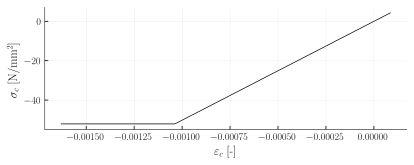

In [4]:
# | label: fig-sigma_epc_t6
# | fig-cap: "Spannungs-Dehnungs-Verhalten des Betons"

epsilon_c = np.array([f_cts / E_c, 0, -f_c/E_c, -epsilon_cu])
sigma_c = np.array([ f_cts.magnitude, 0,-f_c.magnitude, -f_c.magnitude])*f_c.units

plt.plot(epsilon_c, sigma_c, color='black')


plt.xlabel(f'$\\varepsilon_c$ [-]')
plt.ylabel(f'$\\sigma_c$ [N/mm$ ^2$]')


plt.show()

### Betonstahl

Mittelwerte der Zugproben.

In [5]:
%%render params 

Diam_1 = 10*mm
Diam_2 = 12*mm
Diam_3 = 14*mm

f_sy = 500*(MPa)
f_st = 630*(MPa)
epsilon_sv = (24/1000*los).to(percent)
epsilon_sg = (130/1000*los).to(percent)
E_s = 205000*N/mm**2

<IPython.core.display.Latex object>

Die entsprechende Spannungs-Dehnungs-Beziehung ist in @fig-sigma_eps_t6 gezeigt. Als Annahme gilt, dass die Stäbe lediglich unter Zug belastet werden. Die Druckbewehrung wird bei der Bestimmung der Momenten-Krümmungs-Beziehung vernachlässigt. Das Verhalten wird mit einem Bilinearem Verhalten approximiert.

/var/folders/6v/tynjq1yn7y3bk7pgzzw8btj00000gn/T/ipykernel_9176/2320615081.py:4: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  epsilon_s = np.array([0, epsilon_sv, epsilon_sg])
/Users/pascalgitz/miniconda3/envs/calcs/lib/python3.12/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


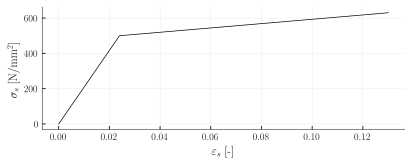

In [6]:
# | label: fig-sigma_eps_t6
# | fig-cap: "Spannungs-Dehnungs-Verhalten der Längsbewehrung"

epsilon_s = np.array([0, epsilon_sv, epsilon_sg])
sigma_s = np.array([ 0,f_sy.magnitude, f_st.magnitude])*f_st.units

plt.plot(epsilon_s, sigma_s, color='black')

plt.xlabel(f'$\\varepsilon_s$ [-]')
plt.ylabel(f'$\\sigma_s$ [N/mm$ ^2$]')


plt.show()

### Geometrie

#### Querschnitt

Die Parameter der Geometrie des Querschnitts beziehen sich auf die @fig-geometrie_qs_t6.

In [7]:
%%render params

h_1 = 180*mm
h_2 = 50*mm
h_3 = 400*mm
h_4 = 30*mm
h_5 = 140*mm
h_tot = h_1 + h_2 + h_3 + h_4 + h_5

b_1_inf = 90*mm
b_2_inf = 220*mm
b_3_inf = 90*mm

b_tot_inf = b_1_inf + b_2_inf + b_3_inf
b_tot_sup = 800*mm

<IPython.core.display.Latex object>

#### Längsrichtung

Der Abschluss des Querschnitts wird nicht mehr weiter verfolgt. Vereinfacht wird der I-Querschnitt als konstant über die Länge betrachtet.

Die beschriebenen Abmessungen $L_n$ sind jeweils vom Stabanfang gemessen.

In [8]:
%%render params

L_1 = 3500*mm
L_2 = 9600*mm

L_tot = L_1 + L_2

<IPython.core.display.Latex object>

### Lasten

In [9]:
%%render params

L_P = 500*mm
L_q = 3.5*m + 300*mm
l_q = 15 *0.6*m #Streckenlast



<IPython.core.display.Latex object>

## Momenten-Krümmungs-Beziehung

Die Momenten-Krümmungs-Beziehung zeigt bei diesem Versuch eine gewisse Komplexität. Grundsätzlich gilt es für jede Abstufung der Bewehrung eine separate Momenten-Krümmungs-Beziehung herzuleiten. 

Wird bei der Vorspannung Spannkraftverluste berücksichtigt, so wirkt der Restquerschnitt des Spannstahls als schlaffe Bewehrung bei Belastung mit. Dies hat Einfluss auf das Momenten-Krümmungs-Verhalten. Durch die parabolische Geometrie des Spannkabels, gilt es die Momenten-Krümmungs-Beziehung unter Variation der Spannkabellage zu definieren, was die Komplexität der Momenten-Krümmungs-Beziehung erhöht.

Um den Rechenaufwand gering zu halten wird lediglich ein qualitatives Verhalten der Momenten-Krümmungs-Beziehung angestrebt. Dabei wird der Querschnitt beim Fliessen der Zugbewehrung betrachtet, sowie wird der Biegewiderstand bestimmt. Diese Punkte werden linear mit einander verbunden. Des Weiteren wird die Druckbewehrung stehts vernachlässigt.



![Querschnittsanalyse mit Fliessen der Zugbewehrung und elastischer Betondruckzone, qualitativer Verlauf](../imgs/QS_14_analyse_4.svg){#fig-qs_fliessen_qualitativ}

![Querschnittsanalyse mit erreichter Zugfestigkeit in der Bewehrung und vollständig plastifizierter Betondruckzone, qualitativer Verlauf](../imgs/QS_14_analyse_5.svg){#fig-qs_widerstand_qualitativ}

## Schiebungs-Beziehung

## Versuchsresultate

![Verformungsverlauf des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_durchbiegung_laengs.svg){#fig-durchbiegung_laengs_t6}


![Last-Verformungs-Verhalten des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_durchbiegungen.svg){#fig-durchbiegung_t6}